### Part I EDA
- 選取資料 - 深耕客服資料檔
- 目標 - 了解大部分的客戶被callout的狀況

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('data/野村客服.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
df.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,Call Out,AA2778,20180103 111132,推Q1


In [4]:
for i in df.index:
    df.at[i, '資料日期'] = datetime.strptime(df.at[i, '資料日期'], '%Y%m%d %H%M%S') 

### 每位客戶的所有callout時間

In [5]:
df_time = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_time.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '資料日期']
df_time.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,2018-01-24 17:37:44,2018-01-24 18:28:21,2018-01-25 10:01:00,2018-01-26 10:04:00,2018-01-29 18:16:00,2018-02-26 10:34:00,2018-02-26 10:47:00,2018-03-07 10:55:00,2018-03-29 14:12:00,2018-06-01 10:11:00,2018-06-12 16:35:00,2018-06-20 16:50:00,2018-06-29 10:18:00,2018-08-24 17:32:00
AA2986,2018-02-27 18:09:27,2018-02-27 18:23:32,2018-03-01 17:27:00,2018-03-06 14:36:00,2018-03-14 15:22:00,2018-03-14 15:24:03,2018-03-16 13:24:19,2018-03-21 14:31:00,NaT,NaT,NaT,NaT,NaT,NaT
AA6076,2018-04-27 15:31:00,2018-06-25 10:22:00,2018-07-26 09:55:09,2018-11-12 15:22:00,2018-12-18 16:14:36,2018-12-18 16:38:00,2018-12-24 10:46:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AA1538,2018-03-27 10:34:19,2018-03-27 11:12:35,2018-06-25 16:46:49,2018-06-25 17:31:30,2018-07-23 14:21:25,2018-07-23 16:32:35,2018-08-14 10:22:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AA3336,2018-06-07 11:29:31,2018-06-15 10:16:00,2018-06-15 10:35:00,2018-06-19 13:02:44,2018-06-27 09:58:00,2018-07-05 14:37:00,2018-07-08 10:55:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### 每位客戶的所有callout內容

In [6]:
df_event = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_event.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%,cherry 人及美都有機會,[ECP]確認文件以掛號寄出,[ECP]0.4% IPO 美1萬3,"[ECP]電確,家管,客人說四年期債申購款已匯",[ECP]亞債人民幣10萬要求0.3%,[ECP]10萬人民幣給0.3% 下週單筆,"[ECP]ABHY ABP 人民幣3月低到期,到時可能會再加一點",[ECP]人民幣 亞高130萬,[ECP]沒信心 沒錢 IPO,"[ECP]帳號過長需修正,掛退","[ECP]電確,有要異動指扣帳戶.",[ECP]本來想要賣4年期 有資需求,[ECP]家庭戶馬X璇319381 請我推基金給他 穩健型都可以
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中...",MGM 戶號318359,"[ECP]確認表單要寄送地址,要求放二支觸控筆","[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM",[ECP]推Q1,開戶文件有收到，現在來寫,女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場,[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我...,NaN,NaN,NaN,NaN,NaN,NaN
AA6076,"[ECP]境外ES被退:無此使用者,客戶的兒子說少打tw,寄表單修改",[ECP]想要買回，要用錢，要全部賣,"帳上環高收都賣掉，今日來電要大俄及日本領月報,今天會寄出","[ECP]收到適性第6,7沒填出生地,,掛退,不願線上更新,經營小吃",進線自營山東火燒是面食類,[ECP]Robo RSP、單筆書面，不常上網 大俄、中國、環球、印度,[ECP] 文件有收到，請客戶寄回RSP書面，詢問中國機會的淨值,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,家庭戶,娘會寄回開戶 二戶 推中國 環球,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行","[ECP]follow 名單,有在銀行買,問和銀行差異及手續費,會再想想是不是要寄回,指扣為...",[ECP]要穩 IPO 中債會參考 已MAIL 好好 會再看,已mail 中債,[ECP]下週會寄回,[ECP]白天不方便接 請晚上打,[ECP]下周打,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 每個客戶平均被聯絡的間隔時間(天)

In [7]:
df_event_time = pd.DataFrame()
for i in df_time.index:
    if not pd.isna(df_time.loc[i][1]):
        df_event_time.at[i, 'mean daydelta'] =  np.mean([ df_time.loc[i][j] - df_time.loc[i][j-1] for j in range(1, len(df_time.loc[i])) if not pd.isna(df_time.loc[i][j])]).days
df_event_time.head()

,mean daydelta
AA4372,16.0
AA2986,3.0
AA6076,40.0
AA1538,23.0
AA3336,5.0


In [8]:
import matplotlib.pyplot as plt

### 每個客戶平均被聯絡的間隔時間(天) - 敘述統計

In [9]:
df_event_time['mean daydelta'].describe()

count    222.000000
mean      40.018018
std       54.461657
min        0.000000
25%        8.000000
50%       17.000000
75%       54.250000
max      302.000000
Name: mean daydelta, dtype: float64

### 每個客戶平均被聯絡的間隔時間(天) - 次數分佈圖

(array([38., 12., 21., 15., 21.,  6., 12., 13.,  9.,  1.,  0.,  2.,  2.,
         7.,  3.,  1.,  2.,  1.,  8.,  0.,  1.,  2.,  3.,  0.,  1.,  1.,
         0.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  5.,  0.,  1.,  2.,
         0.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  0.  ,   3.02,   6.04,   9.06,  12.08,  15.1 ,  18.12,  21.14,
         24.16,  27.18,  30.2 ,  33.22,  36.24,  39.26,  42.28,  45.3 ,
         48.32,  51.34,  54.36,  57.38,  60.4 ,  63.42,  66.44,  69.46,
         72.48,  75.5 ,  78.52,  81.54,  84.56,  87.58,  90.6 ,  93.62,
         96.64,  99.66, 102.68, 105.7 , 108.72, 111.74, 114.76, 117.78,
        120.8 , 123.82, 126.84, 129.86, 132.88, 135.9 , 138.92, 141.94,
  

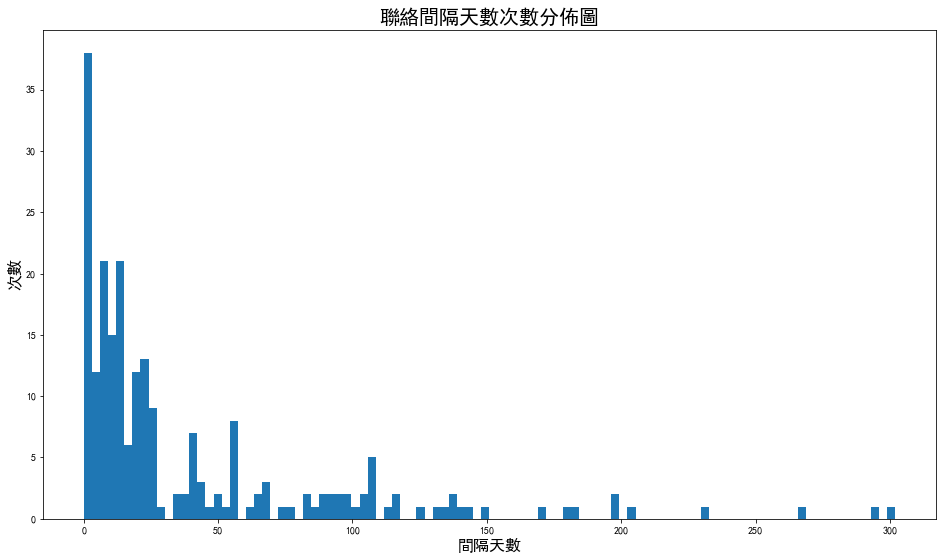

In [10]:
plt.figure(figsize = (16, 9))
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('聯絡間隔天數次數分佈圖', size = 20)
plt.xlabel('間隔天數', size = 16)
plt.ylabel('次數', size = 16)
plt.hist([i for i in df_event_time['mean daydelta'] if not pd.isna(i)], bins=100)

_由上圖與敘述統計可知，大部分的間隔天數都在50天內_

### 每個客戶call out次數 - 敘述統計

In [11]:
df['Unique ID'].value_counts().describe()

count    572.000000
mean       1.746503
std        1.314238
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       14.000000
Name: Unique ID, dtype: float64

### call out次數為1之客戶

In [12]:
df_freq_1 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] == 1:
        df_freq_1 = pd.concat([df_freq_1, df[df['Unique ID'] == i]], ignore_index=True)
df_freq_1.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3801,2018-12-24 17:09:10,轉介-tina，在銀行買天達策略股票，詢問天達特許品牌，不太了解基金，詢問市場，在想要不要先...
1,Call Out,AA3283,2018-06-04 15:16:51,Money名單分配 國泰
2,Call Out,AA2159,2018-03-06 15:48:00,[ECP]242383蔡○員推薦
3,Call Out,AA3701,2018-10-02 13:52:11,robo委任契約，MGM建議員工加開
4,Call Out,AA3360,2018-06-07 18:05:52,退休專刊


### call out次數分佈圖

In [13]:
from highcharts import Highchart
H = Highchart(width=750, height=600)

data1 = list(df['Unique ID'].value_counts().value_counts())

options = {'title': {
        'text': 'Total number of call out (per UniqueID)'
    },
    'xAxis': {
        'categories': list(df['Unique ID'].value_counts().value_counts().index),
        'title': {
            'text': None
        }
    },
    'yAxis': {
        'min': 0,
        'title': {
            'text': 'count',
            'align': 'high'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'tooltip': {
        'valueSuffix': ' people'
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'backgroundColor': "((Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF')",
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

H.add_data_set(data1, 'bar', 'frequency')

H

<img src="images/callout次數分佈圖.png" />

_由上圖可知，大部分的call out客戶次數都在2次以內_

### Part II 文字探勘與視覺化
- 目標
    - 了解客服正在力推的產品
    - 了解客服用詞
    - 使用TDM、共線圖與熱度圖分析字詞間的關聯性

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import jieba.analyse
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [17]:
stopWords = []
with open('data/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [18]:
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [19]:
with open('data/addWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/dj/wmbw561s10sdm1y3qgh7w_700000gn/T/jieba.cache
Loading model cost 1.164 seconds.
Prefix dict has been built succesfully.


In [77]:
df_terms = pd.read_csv('data/野村客服.csv')
df_terms.drop('Unnamed: 0', axis = 1, inplace = True)

In [21]:
df_terms.head()

,Unnamed: 0,類別,Unique ID,資料日期,客戶事件描述
0,0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,4,Call Out,AA2778,20180103 111132,推Q1


In [22]:
error_lst = []
terms=[]
for i in range(len(df_terms['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)):
            if j not in stopWords:
                terms.append(j)
    except:
        error_lst.append([i, df_terms['客戶事件描述'][i]])

In [23]:
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)[:10]

[('客戶', 171),
 ('推', 159),
 ('開戶', 136),
 ('名單', 85),
 ('退休專刊', 83),
 ('電子報訂閱名單', 78),
 ('寄送', 77),
 ('追蹤', 75),
 ('買', 67),
 ('IPO', 65)]

### 文字雲

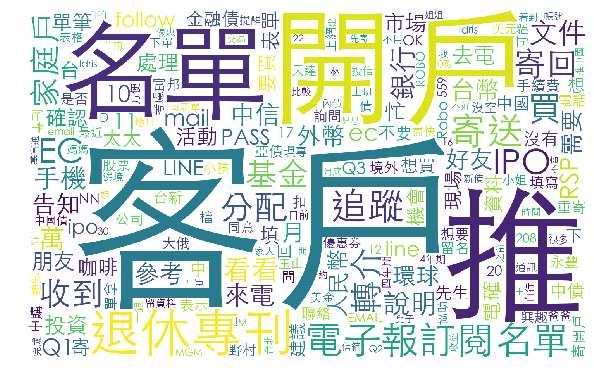

In [24]:
wc = WordCloud(background_color = "white", width = 1440, height = 900, margin= 2, font_path="STHeiti Light.ttc")
wc.generate_from_frequencies(Counter(terms))
plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

_由文字雲可知，業務非常積極推薦產品，許多callout客戶都是尋求開戶的幫助，另有一大部分為退休專刊的callout名單_

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [31]:
names = {}          
relationships = {}  
lineNames = []  
for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:    
                relationships[w] = {}            
    except:
        pass

In [32]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [33]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_terms['客戶事件描述'][i]] = num

### TDM

In [34]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM.head()

,去電,確認,開戶,文件,客戶,後來,買,美元,保單,不方,...,投資金額,NTD20M,全國性,附給,不定期,併,房貸,放長,已下,50000
10/1 10:52手機本人表示正在忙，前已建立潛在，A174660，請我晚點撥，強基金九月名單客戶,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/17 11:53庫存全品+環球+巴西無RSP，建議重新恢復環球契約，客戶說再看看，EMAIL要改為先生的，,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/18 16:37已引導完成---15:58手機本人，表示投資都是爸爸處理的，撥家裡終於找到爸爸-林O欽15754，爸爸表示目前兒子再考公職，沒有工作，所以停扣，等有工作就會扣了，覺得亞太複合高收益債券表現不好，已說明，另推十月品牌月活動，爸爸要把自己的愛爾蘭美高收不定額改為D檔，請我引導交易，後續去電家電就不通…持續連繫,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11/28 14:46來電IB表示要開戶，想要買台灣高股息，設定台新 台外幣 境內外 轉Idris,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11701王O如小孩,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Co-Occurrence Matrix

In [35]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 15]

In [36]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,留名,推,分配,中信,寄送,咖啡,EC,11,客戶,好友,...,家庭戶,手機,外幣,退休專刊,收到,IPO,基金,Q1,名單,確認
留名,NaN,NaN,NaN,NaN,NaN,17.0,NaN,17.0,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
推,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,...,26.0,NaN,18.0,NaN,NaN,24.0,NaN,30.0,NaN,NaN
分配,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN
中信,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN
寄送,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

_使用sigmoid函式縮小最大與最小距離之差距，讓有些關聯太大的字不要擠在一起_

### 共線圖

/Users/apple/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


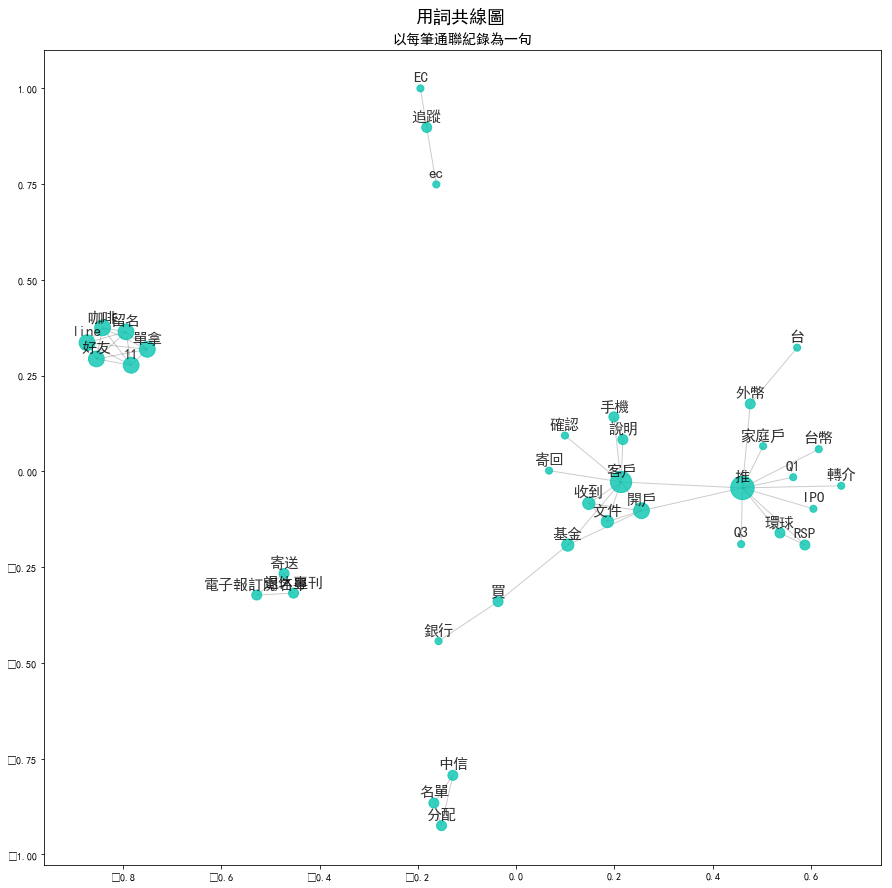

In [38]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

- 以每筆通聯紀錄為分析基準，發現主要有幾種不同類型的通話內容：
    - 推產品：環球、外幣、IPO等
    - 開戶與一般客戶事項
    - 電子報訂閱名單的callout
    - 711咖啡活動callout
    - 電子交易(EC)追蹤

### Heatmap

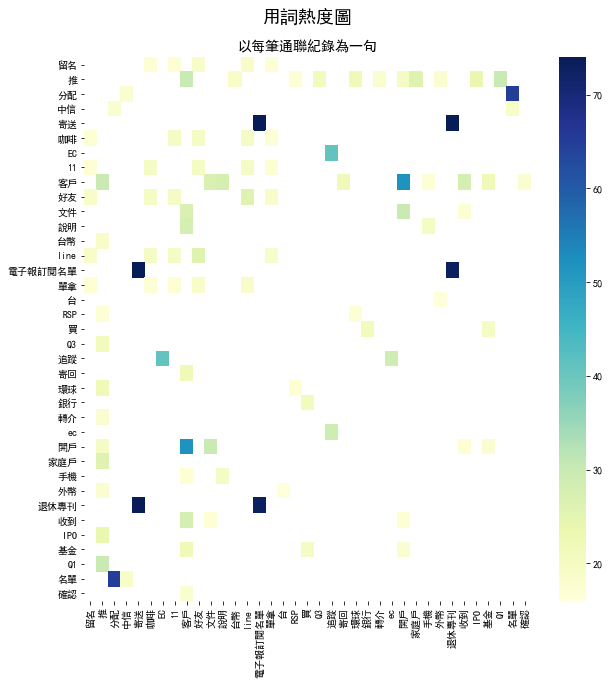

In [39]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞熱度圖',x = 0.435,y=0.95, fontsize=18)
#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

### 以每個客戶為基準，再做一次，觀察有沒有改變

In [40]:
df_event = pd.DataFrame()
for i in df_terms['Unique ID'].value_counts().index:
    for j in df_terms[df_terms['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df_terms[df_terms['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_by_id = pd.DataFrame()
df_by_id['客戶事件描述'] = df_event[0]
df_by_id.index = df_event.index
for i in df_event.index:
    df_by_id.at[i, '客戶事件描述']  = ' '.join([str(j) for j in df_event.loc[i] if not pd.isna(j)])

In [41]:
df_by_id.head()

,客戶事件描述
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5...
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中..."
AA6076,"[ECP]境外ES被退:無此使用者,客戶的兒子說少打tw,寄表單修改 [ECP]想要買回，要..."
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫 208 娘298803廖○霞 去電娘29...
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行 [ECP]follow 名單,有..."


In [42]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_by_id['客戶事件描述'])):
    try:
        poss = jieba.cut(df_by_id['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None:
                names[w] = 0
            relationships[w] = {}
            names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_unicodes = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 30]

In [43]:
np.random.shuffle(co_occur_by_unicodes)
temp_matrix = pd.DataFrame()
for i in co_occur_by_unicodes:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_unicodes = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_unicodes.at[i, j] = temp_matrix.at[i, j]

In [44]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_unicodes = [i[2] for i in co_occur_by_unicodes]
co_occur_by_unicodes_sig = []
for i in co_occur_by_unicodes:
    co_occur_by_unicodes_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_unicodes))/np.std(count_by_unicodes))])

/Users/apple/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


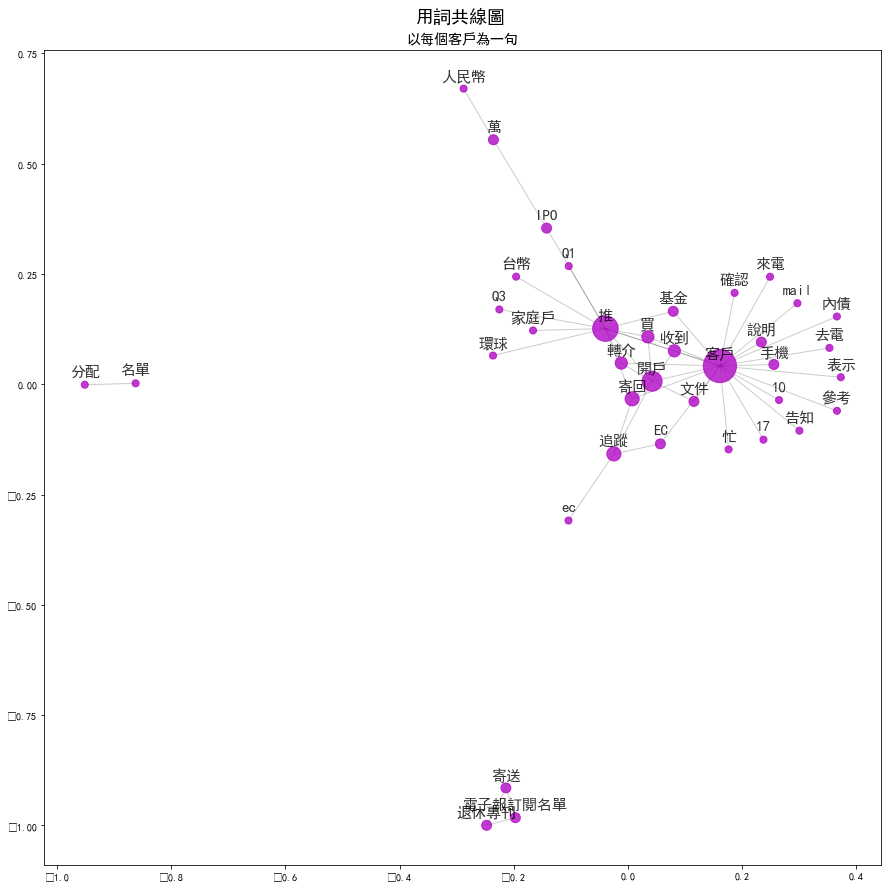

In [45]:
plt.figure(figsize=(15,15))
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_unicodes_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8, node_size=[val*50 for (node, val) in g.degree()], node_color='#b108c5')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2) 
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每個客戶為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("image/用詞共線圖_以每個客戶為一句.png", dpi=100)
plt.show()

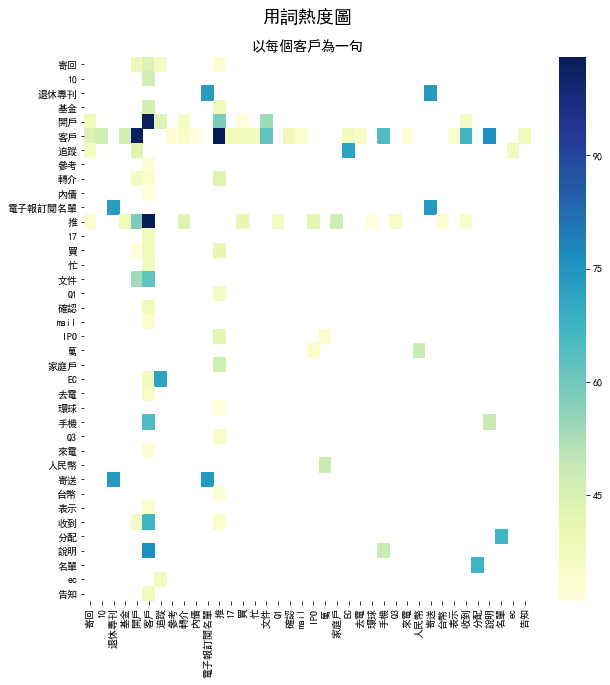

In [46]:
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_unicodes,cmap='YlGnBu')
plt.title('以每個客戶為一句', size = 14)
plt.suptitle('用詞熱度圖',x = 0.435,y=0.95, fontsize=18)
#plt.savefig("images/用詞熱度圖_以每個客戶為一句.png", dpi=100)
plt.show()

- 以客戶為分析基準，發現主要有幾種不同類型的通話內容：
    - 推產品：Q3、人民幣、IPO等等
    - 客戶處理一般事務
    - 電子報訂閱名單的callout

---

觀察發現，兩種分析方式並無太大差別，以客戶為分析基準可看出更多關聯詞  
- 若需要更近一步研究，可能需要以下資料
    - 客戶檔案
    - 常受到推薦的基金之銷售狀況

note for 4/11野村的家庭戶為推廣重點

### 找出被推薦的熱門產品

In [65]:
all_co = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 25]

In [67]:
product = {}
for co_word in co_occur_by_records:
    if '推' in co_word:
        for term in co_word:
            if term != '推' and type(term) != int:
                product[term] = 1
product.keys()

dict_keys(['台幣', 'RSP', 'Q1', 'IPO', 'Q3', '客戶', '轉介', '家庭戶', '外幣', '開戶', '環球'])

In [72]:
reco_product = []
for word in product.keys():
    if word != '開戶' and word != '轉介' and word != '家庭戶':
        reco_product.append(word)

In [144]:
print('客服推薦之熱門產品 -', ' '.join(reco_product))

客服推薦之熱門產品 - 台幣 RSP Q1 IPO Q3 客戶 外幣 環球


In [158]:
id_dic = {}
df_recom = pd.DataFrame()
for i in range(len(df_terms)):
    for product in reco_product:
        if product in df_terms.at[i, '客戶事件描述'] and '推' in df_terms.at[i, '客戶事件描述'] :
            df_recom = pd.concat([df_recom, df_terms[df_terms.index == i]], axis=0, join='outer', join_axes=None, sort=True)
            id_dic[df_terms.at[i, 'Unique ID']] = 1

In [159]:
print('有被對推熱門產品的id數量 -', len(id_dic))

有被對推熱門產品的id數量 - 97


_需要後續銷售資料的客戶id_

In [160]:
list(id_dic.keys())[:10]

['AA2778',
 'AA5706',
 'AA2844',
 'AA2849',
 'AA2850',
 'AA0809',
 'AA2855',
 'AA2856',
 'AA2858',
 'AA2833']

_被推薦熱門產品的內容_

In [162]:
df_recom.drop_duplicates(subset='客戶事件描述', keep='first', inplace=False).head()

,Unique ID,客戶事件描述,資料日期,類別
4,AA2778,推Q1,20180103 111132,Call Out
26,AA5706,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲,20180110 162654,Call Out
27,AA2844,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬,20180110 162832,Call Out
36,AA2849,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論,20180111 170955,Call Out
37,AA2850,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印,20180111 180206,Call Out


```python
    df_id = pd.DataFrame()
    for i in id_dic.keys():
        for j in df_terms[df_terms['Unique ID'] == i].index:
            df_id = pd.concat([df_id, df_terms[df_terms.index == j]], axis=0, join='outer', join_axes=None, sort=True)
```